In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("piyushkumar9321/economic-index")

print("Path to dataset files:", path)

c:\Users\hp\AppData\Local\Programs\Python\Python38-32\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 441/441 [00:00<00:00, 23.2kB/s]

Extracting model files...
Path to dataset files: C:\Users\hp\.cache\kagglehub\datasets\piyushkumar9321\economic-index\versions\1


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

In [4]:
df_index = pd.read_csv(
    r"C:\Users\hp\.cache\kagglehub\datasets\piyushkumar9321\economic-index\versions\1\economic_index.csv"
)


In [5]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
df_index.isnull().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [9]:
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

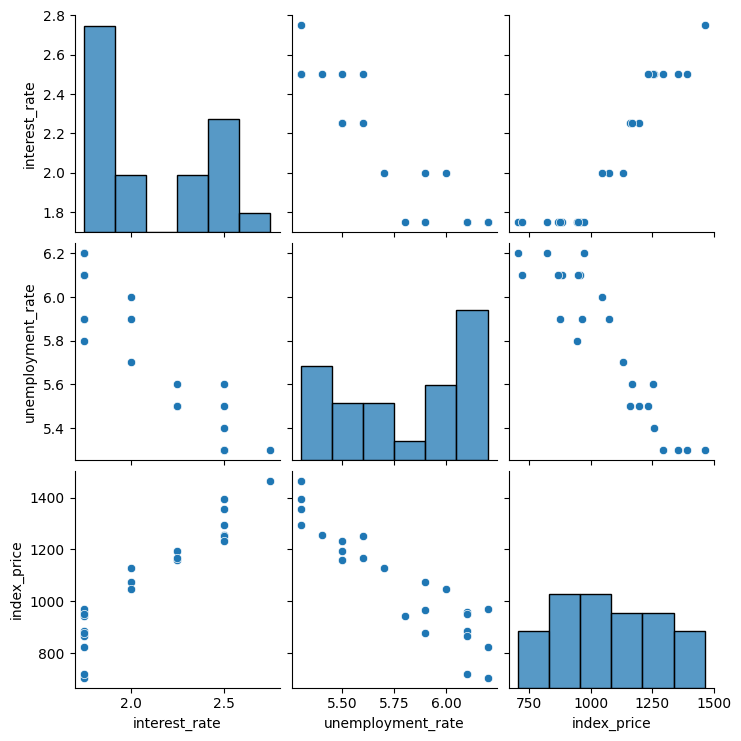

In [10]:
import seaborn as sns 
sns.pairplot(df_index)

In [11]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

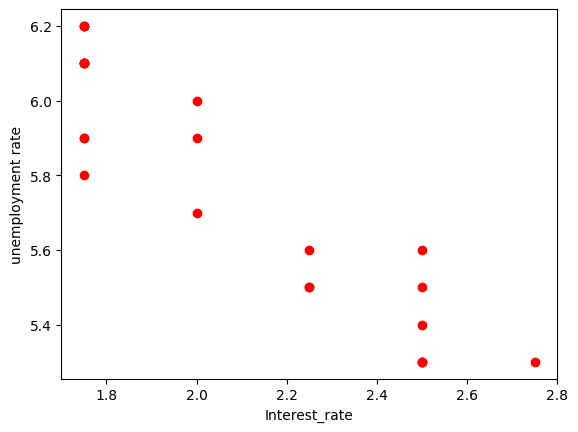

In [14]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('Interest_rate')
plt.ylabel('unemployment rate')

In [15]:
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,:-1]

In [16]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [17]:
y

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [26]:
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

c:\Users\hp\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate', ylabel='index_price'>

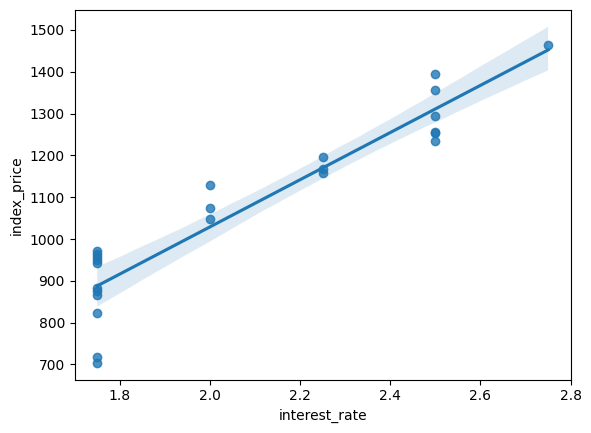

In [19]:
import seaborn as sns 
sns.regplot(df_index['interest_rate'],df_index['index_price'])

c:\Users\hp\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate', ylabel='unemployment_rate'>

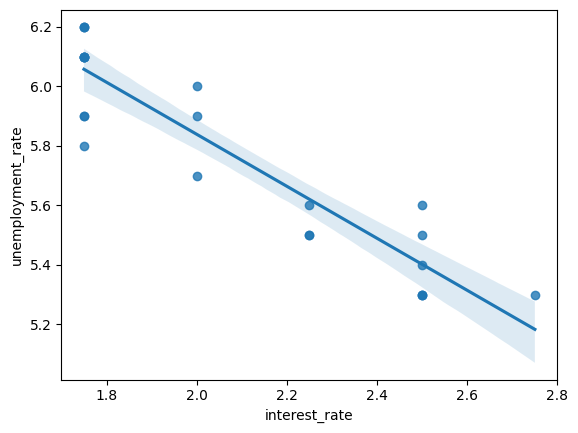

In [21]:
sns.regplot(df_index['interest_rate'],df_index['unemployment_rate'])

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [29]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [30]:
regressor.fit(X_train,y_train)

LinearRegression()

In [33]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [35]:
np.mean(validation_score)

-2.7997518734406443e-31

In [39]:
y_pred=regressor.predict(X_test)
y_pred

array([[2.19923488, 5.49448392],
       [1.75441685, 6.13367056],
       [2.64405291, 5.31185917],
       [1.75441685, 6.04235818],
       [1.97682587, 5.85973343]])

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mse)
print (rmse)

0.002389257790129321
0.002389257790129321
0.04888003467806995


In [42]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.9818011779870272
